Chosen mus: [3 2 0]
Chosen sigmas: [1.5 1.5 1.5]
Starting EM Algorithm
Step # 0
Step # 100
Step # 200
Step # 300
Step # 400
Step # 500
Step # 600
Step # 700
Step # 800
Step # 900
Done!
Estimated mus: [ 3.78419314 -0.78821526  1.57536404]
Reals mus: [3 2 0]
Estimated sigmas: [1.08381303 1.08288454 1.03323291]
Reals sigmas: [1.5 1.5 1.5]


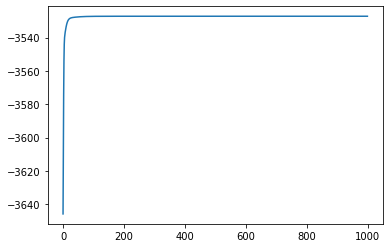

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# set random seed so that everytime we get the same result
np.random.seed(1)

# customizable algorithm parameters
n_gaussians = 3
data_per_guassian = 1000
real_mus = np.random.choice(range(4), n_gaussians, replace=False)
real_sigmas = np.full(n_gaussians, 1.5)

print('Chosen mus:', real_mus)
print('Chosen sigmas:', real_sigmas)

# prepare simulation data
N = n_gaussians * data_per_guassian
y = np.zeros((data_per_guassian, n_gaussians))

for i in range(n_gaussians):
  y[:,i] = np.random.normal(real_mus[i], real_sigmas[i], data_per_guassian)

y = y.flatten()

# EM algorithm

# Initialization
nsteps = 1000
count = 0 # should be initialized as 0

ps = np.ones(n_gaussians) / n_gaussians
mus = np.full(n_gaussians, np.random.choice(y, n_gaussians))
sigmas = np.full(n_gaussians, np.std(y))
gammas = np.zeros((N,n_gaussians))

log = np.zeros(nsteps)

print("Starting EM Algorithm")

while count < nsteps:
    if count % 100 == 0:
      print("Step #", count)
    # E-step
    for i in range(N):
      nums = ps * np.exp(-(y[i]-mus)**2/(2*sigmas)) / np.sqrt(sigmas)
      gammas[i,] = nums / sum(nums)

    # M-step
    temp = np.zeros(N)
    for i in range(n_gaussians):
      mus[i] = sum(gammas[:,i] * y) / sum(gammas[:,i])
      sigmas[i] = np.sqrt(sum(gammas[:,i] * (y - mus[i])**2) / sum(gammas[:,i]))
      ps[i] = sum(gammas[:,i]) / N
      temp = temp + (ps[i] * np.exp(-(y-mus[i])**2/(2*sigmas[i])) / np.sqrt(sigmas[i]))
    
    log[count] = sum(np.log(temp))

    count = count + 1

print('Done!')
    
print('Estimated mus:', mus)
print('Reals mus:', real_mus)
print('Estimated sigmas:', sigmas)  
print('Reals sigmas:', real_sigmas)
plt.plot(range(nsteps), log)

The model chooses 3 random mu values (3, 2, and 0) in this case and assigns each a sigma of 1.5. After 1,000 iterations of th EM algorithm, the estimated mu values are approximately (3.784, 1.575, and -0.788) with sigmas of (1.08, 1.03, and 1.08) respectively. In this case, there seems to be a significant amount of error in the estimated mu values mostly due to a large sigma. Descreasing the sigmas below 1 reduces the error to less than 0.1 for each mu value.